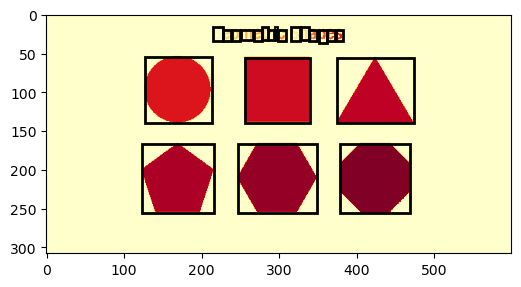

In [1]:
#2.1 Gán nhãn ảnh
from PIL import Image
import numpy as np
import imageio.v2 as iio
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)

thres = threshold_otsu(a)
b = a > thres

c = label(b)
cl = Image.fromarray(c.astype(np.uint8))
iio.imwrite('label_output.jpg', cl)

d = regionprops(c)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, uc = i['BoundingBox'][:2]
    ur, lc = i['BoundingBox'][2:]
    rec_width = uc - lc
    rec_height = ur - lr
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height,
                              fill=False, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
plt.show()

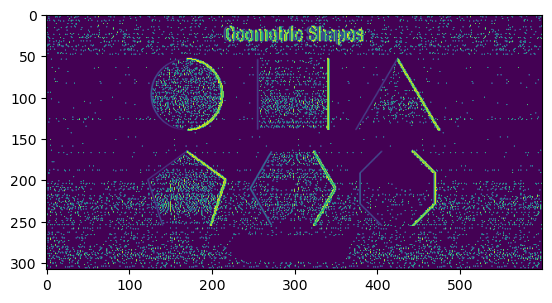

In [2]:
#2.2 Dò tìm cạnh theo chiều dọc
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pylab as plt

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
bmg = abs(a - nd.shift(a, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

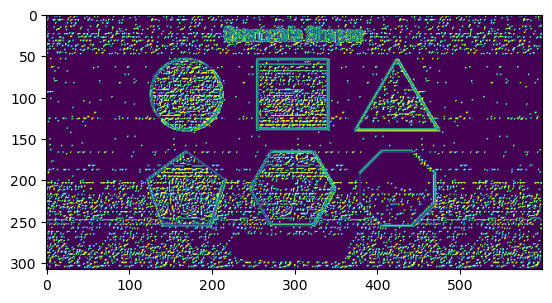

In [3]:
#2.3 Dò tìm cạnh với Sobel Filter
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pylab as plt

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
sx = nd.sobel(a, axis=0)
sy = nd.sobel(a, axis=1)
bmg = abs(sx) + abs(sy)
plt.imshow(bmg)
plt.show()

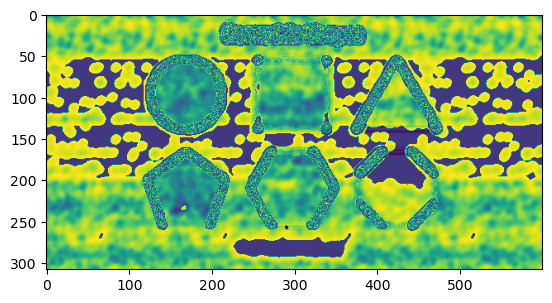

In [4]:
#2.4 Xác định góc của đối tượng
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pylab as plt

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    xx = x ** 2
    yy = y ** 2
    xy = abs(x * y)
    xl = nd.gaussian_filter(xx, 3)
    yl = nd.gaussian_filter(yy, 3)
    xy = nd.gaussian_filter(xy, 3)
    detC = xl * yl - 2 * xy
    trC = xl + yl
    R = detC - alpha * trC ** 2
    return R

data = Image.open('geometric.png').convert('L')
data = np.asarray(data)
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

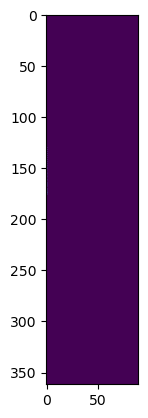

In [5]:
#2.5 Dò tìm hình dạng cụ thể trong ảnh với Hough Transform
import numpy as np
import matplotlib.pylab as plt

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))
    ho = np.zeros((R, 90), float)
    w = data + 0
    ok = 1
    theta = np.arange(90).astype(float) * np.pi / 180

    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            y, h = divmod(w.argmax(), H)
            x = h
            v = V - y
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= theta[i] < 90:
                    ho[int(rh[i]), int(theta[i])] += mx
            w[y, h] = 0
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()

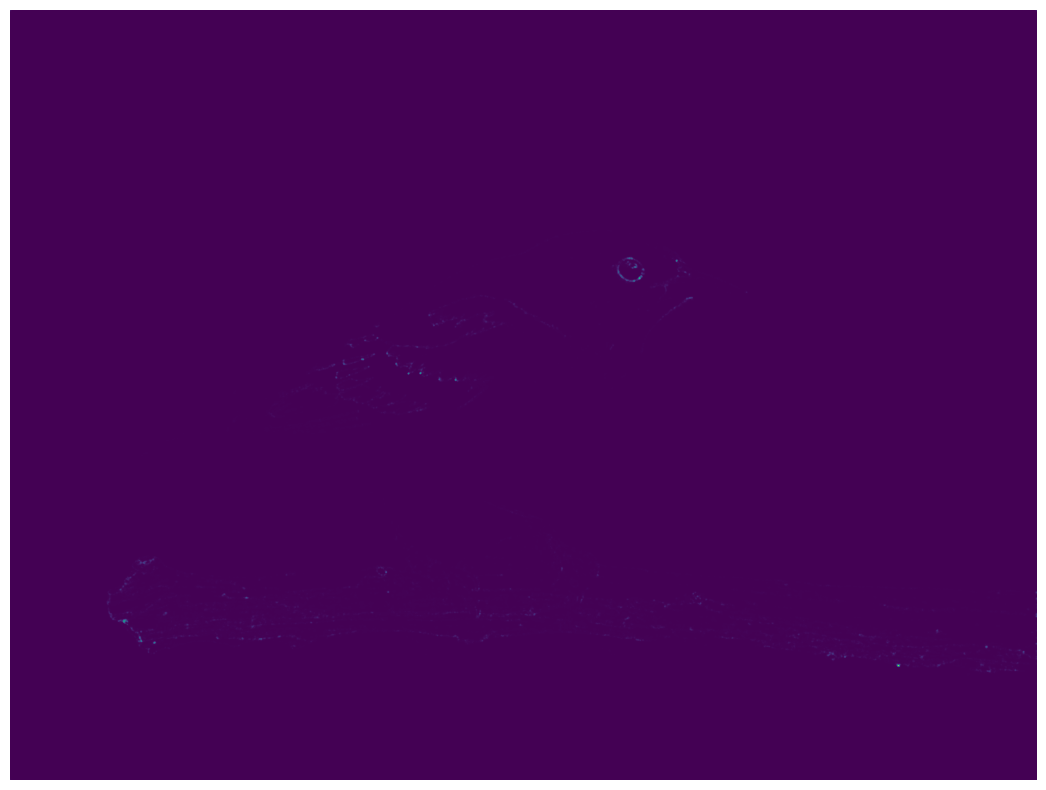

In [7]:
#2.5.2 Dò tìm đường tròn trong ảnh
from PIL import Image
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from skimage.color import rgb2gray
from skimage.feature import corner_harris

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k=0.001)

plt.figure(figsize=(20, 10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()